<a href="https://colab.research.google.com/github/AshtonGlover/stock-prediction/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

In [3]:
import pandas as pd
import tensorflow

#truncated_name = file_path.split(".")[0]
file_path = "datasets/" + file_path if 'file_path' in globals() else 'datasets/MSFT.csv'

df = pd.read_csv(file_path)

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-08-23,323.820007,329.200012,323.459991,327.000000,324.563812,21166400
1,2023-08-24,332.850006,332.980011,319.959991,319.970001,317.586182,23281400
2,2023-08-25,321.470001,325.359985,318.799988,322.980011,320.573761,21684100
3,2023-08-28,325.660004,326.149994,321.720001,323.700012,321.288391,14808500
4,2023-08-29,321.880005,328.980011,321.880005,328.410004,325.963318,19284600
...,...,...,...,...,...,...,...
247,2024-08-16,420.600006,421.339996,417.299988,418.470001,418.470001,22775600
248,2024-08-19,418.959991,421.750000,416.459991,421.529999,421.529999,15234000
249,2024-08-20,421.700012,425.859985,421.640015,424.799988,424.799988,16387600
250,2024-08-21,424.079987,426.399994,421.720001,424.140015,424.140015,16067300


In [4]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2023-08-23,327.000000
1,2023-08-24,319.970001
2,2023-08-25,322.980011
3,2023-08-28,323.700012
4,2023-08-29,328.410004
...,...,...
247,2024-08-16,418.470001
248,2024-08-19,421.529999
249,2024-08-20,424.799988
250,2024-08-21,424.140015


In [5]:
import datetime

def strToDate(s):
  split_date = s.split('-')
  day, month, year = int(split_date[2]), int(split_date[1]), int(split_date[0])
  return datetime.datetime(year = year, month = month, day = day)

In [6]:
df['Date'] = df['Date'].apply(strToDate)
df['Date']

/var/folders/t5/bfwy3czx4ks1lybmc4f9rd5m0000gn/T/ipykernel_95264/3418807745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(strToDate)


0     2023-08-23
1     2023-08-24
2     2023-08-25
3     2023-08-28
4     2023-08-29
         ...    
247   2024-08-16
248   2024-08-19
249   2024-08-20
250   2024-08-21
251   2024-08-22
Name: Date, Length: 252, dtype: datetime64[ns]

In [7]:
df.index = df.pop('Date')
df

,Close
Date,
2023-08-23,327.000000
2023-08-24,319.970001
2023-08-25,322.980011
2023-08-28,323.700012
2023-08-29,328.410004
...,...
2024-08-16,418.470001
2024-08-19,421.529999
2024-08-20,424.799988


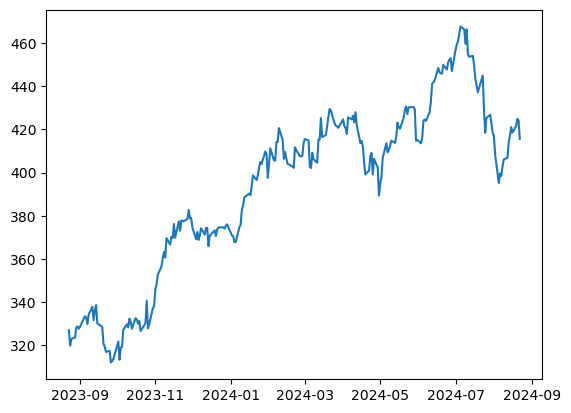

In [8]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [23]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=30):
  first_date = strToDate(first_date_str)
  last_date  = strToDate(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

first_date = df.iloc[30].name
first_date = first_date.strftime("%Y-%m-%d")
last_date = df.iloc[-1].name
last_date = last_date.strftime("%Y-%m-%d")

windowed_df = df_to_windowed_df(df, first_date, last_date)
windowed_df

,Target Date,Target-30,Target-29,Target-28,Target-27,Target-26,Target-25,Target-24,Target-23,Target-22,...,Target-9,Target-8,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2023-10-05,327.000000,319.970001,322.980011,323.700012,328.410004,328.790009,327.760010,328.660004,333.549988,...,317.010010,317.540009,312.140015,312.790009,313.640015,315.750000,321.799988,313.390015,318.959991,319.359985
1,2023-10-06,319.970001,322.980011,323.700012,328.410004,328.790009,327.760010,328.660004,333.549988,332.880005,...,317.540009,312.140015,312.790009,313.640015,315.750000,321.799988,313.390015,318.959991,319.359985,327.260010
2,2023-10-09,322.980011,323.700012,328.410004,328.790009,327.760010,328.660004,333.549988,332.880005,329.910004,...,312.140015,312.790009,313.640015,315.750000,321.799988,313.390015,318.959991,319.359985,327.260010,329.820007
3,2023-10-10,323.700012,328.410004,328.790009,327.760010,328.660004,333.549988,332.880005,329.910004,334.269989,...,312.790009,313.640015,315.750000,321.799988,313.390015,318.959991,319.359985,327.260010,329.820007,328.390015
4,2023-10-11,328.410004,328.790009,327.760010,328.660004,333.549988,332.880005,329.910004,334.269989,337.940002,...,313.640015,315.750000,321.799988,313.390015,318.959991,319.359985,327.260010,329.820007,328.390015,332.420013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2024-08-16,467.559998,466.239990,459.540009,466.250000,454.700012,453.549988,453.959991,449.519989,443.519989,...,395.149994,399.609985,398.429993,402.690002,406.019989,406.809998,414.010010,416.859985,421.029999,418.470001
218,2024-08-19,466.239990,459.540009,466.250000,454.700012,453.549988,453.959991,449.519989,443.519989,440.369995,...,399.609985,398.429993,402.690002,406.019989,406.809998,414.010010,416.859985,421.029999,418.470001,421.529999
219,2024-08-20,459.540009,466.250000,454.700012,453.549988,453.959991,449.519989,443.519989,440.369995,437.109985,...,398.429993,402.690002,406.019989,406.809998,414.010010,416.859985,421.029999,418.470001,421.529999,424.799988
220,2024-08-21,466.250000,454.700012,453.549988,453.959991,449.519989,443.519989,440.369995,437.109985,442.940002,...,402.690002,406.019989,406.809998,414.010010,416.859985,421.029999,418.470001,421.529999,424.799988,424.140015


In [24]:
def windowed_df_to_date_x_y(windowed_dataframe):
  dfasnp = windowed_dataframe.to_numpy()

  dates = dfasnp[:, 0]

  middle_matrix = dfasnp[:, 1:-1]

  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = dfasnp[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_x_y(windowed_df)

dates.shape, X.shape, y.shape

((222,), (222, 30, 1), (222,))

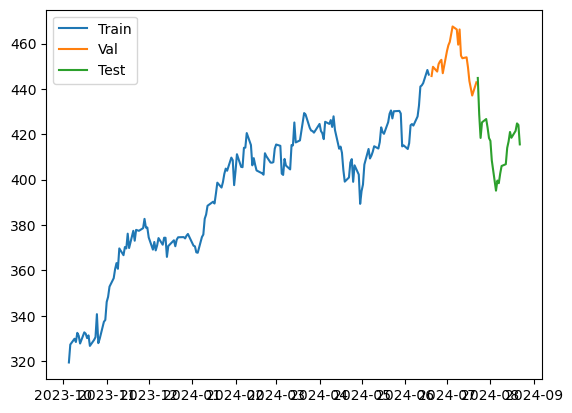

In [25]:
train_split = int(len(dates) * 0.8)
val_split = int(len(dates) * 0.9)

dates_train, x_train, y_train = dates[:train_split], X[:train_split], y[:train_split]

dates_val, x_val, y_val = dates[train_split:val_split], X[train_split:val_split], y[train_split:val_split]

dates_test, x_test, y_test = dates[val_split:], X[val_split:], y[val_split:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Val', 'Test'])

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = Sequential([
                    layers.Input(shape=(30, 1)),

                    layers.LSTM(units=256),

                    layers.Dense(units=256, activation='relu'),
                    layers.Dense(units=128, activation='relu'),
                    layers.Dense(units=64, activation='relu'),
                    layers.Dense(units=32, activation='relu'),
                    layers.Dense(units=1)
                ])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs = 100)



Epoch 1/100
6/6 [==============================] - 1s 86ms/step - loss: 155103.1562 - mean_absolute_error: 392.6339 - val_loss: 203110.8594 - val_mean_absolute_error: 450.6041
Epoch 2/100
6/6 [==============================] - 0s 18ms/step - loss: 152973.5781 - mean_absolute_error: 389.9167 - val_loss: 199094.1094 - val_mean_absolute_error: 446.1247
Epoch 3/100
6/6 [==============================] - 0s 19ms/step - loss: 147872.8438 - mean_absolute_error: 383.2797 - val_loss: 189121.7969 - val_mean_absolute_error: 434.8044
Epoch 4/100
6/6 [==============================] - 0s 17ms/step - loss: 135220.2656 - mean_absolute_error: 366.2849 - val_loss: 165112.3906 - val_mean_absolute_error: 406.2577
Epoch 5/100
6/6 [==============================] - 0s 20ms/step - loss: 107130.7344 - mean_absolute_error: 325.4877 - val_loss: 116143.7031 - val_mean_absolute_error: 340.6998
Epoch 6/100
6/6 [==============================] - 0s 26ms/step - loss: 56687.3828 - mean_absolute_error: 233.2866 - val

6/6 [==============================] - 0s 5ms/step


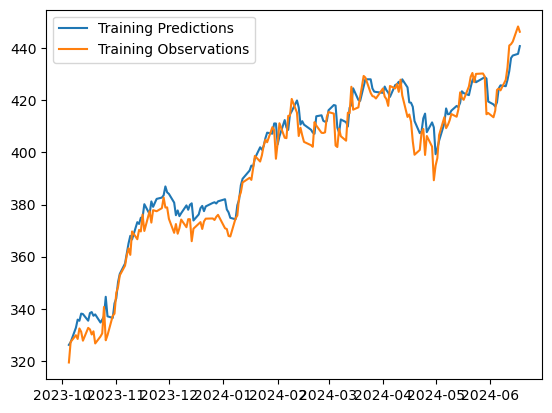

In [27]:
train_predict = model.predict(x_train).flatten()

plt.plot(dates_train, train_predict)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

save_path = 'outputs/' + truncated_name + '/' + truncated_name + "_training.png"
plt.savefig(save_path)

1/1 [==============================] - 0s 15ms/step


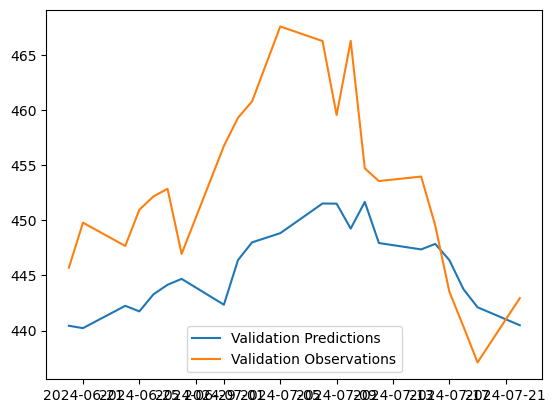

In [28]:
val_predict = model.predict(x_val).flatten()

plt.plot(dates_val, val_predict)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

save_path = 'outputs/' + truncated_name + '/' + truncated_name + "_validation.png"
plt.savefig(save_path)

1/1 [==============================] - 0s 17ms/step


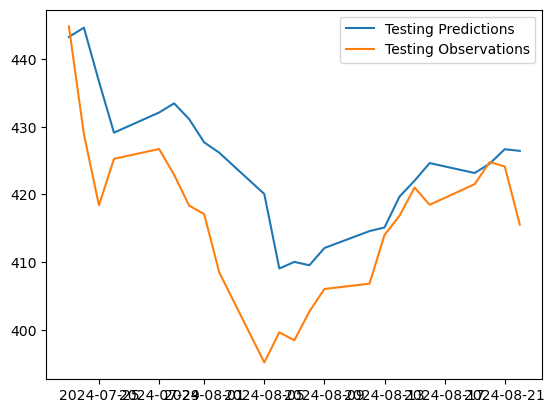

In [29]:
test_predict = model.predict(x_test).flatten()

plt.plot(dates_test, test_predict)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

save_path = 'outputs/' + truncated_name + '/' + truncated_name + "_testing.png"
plt.savefig(save_path)

In [15]:
%pip install tensorflow
